# Capítulo 10 - Swiss-Prot e ExPASy

## 10.1 Analisando arquivos Swiss-Prot

Swiss-Prot (https://web.expasy.org/docs/swiss-prot_guideline.html) é um banco de dados com curadoria feita à mão de sequências proteicas. Biopython podem analisar o 'texto' do formato de arquivo Swiss-Prot, que continua sendo usado para o UniProt Knowledgebase cujo combina Swiss-Prot, TrEMBL e PIR-PSD.

Apesar de mantermos o foco na leitura das informações seja possível para um humano, `Bio.SeqIO` pode ler tanto a forma humana como o UniProt XML para anotações de sequências proteicas.

### 10.1.1 Analisando registros Swiss-Prot

Na **Seção 5.3.2** do Capítulo 5 (https://github.com/GTL98/biopython_br/tree/main/Cap%205%20-%20Sequ%C3%AAncias%20Input_Output), descrevemos com extrair informações de sequências de um registro Swiss-Prot como um objeto **SeqRecord**. Alternativamente, você pode armazenar o registro Swiss-Prot em um objeto `Bio.SwissProt.Record`, que guarda a informação completa contida no registro Swiss-Prot. Nessa seção, descreveremos como extrair os objetos `Bio.SwissProt.Record` de arquivos Swiss-Prot.

Para analisar um registro Swiss-Prot, vamos identificar esse registro. Temos algumas maneiras de dazer isso, dependendo de onde e como esse registro está armazenado:

- Abrir um arquivo Swiss-Prot localmente:

In [ ]:
identificador = open('meu_arquivo_swissprot.dat')

- Abrir um Swiss-Prot arquivo gzipado:

In [ ]:
import gzip
identificador = gzip.open('meu_arquivo_swissprot.dat.gz', 'rt')

- Abrir um arquivo Swiss-Prot a partir da internet (fazer isso antes de chamar a função **read**):

In [ ]:
from urllib.request import urlopen
url = 'https://raw.githubusercontent.com/biopython/biopython/master/Tests/SwissProt/F2CXE6.txt'
identificador - urlopen(identificador)

- Abrir um arquivo Swiss-Prot pela internet do banco de dados ExPASy (veja a **Seção 10.5.1** para mais informações):

In [ ]:
from Bio import ExPASy
meus_numeros_acesso = ['O23729', 'O23730', 'O23731']
identificador = ExPASy.get_sprot_raw(meus_numeros_acesso)

O ponto chave é que para o analisador, pouco importa como o identificador foi criado, contando que aponte para dados no formato Swiss-Prot. O analisador automaticamente decodificará os dados como ASCII (a codificação usada pelo Swiss-Prot) se o identificador for aberto em modo binário.

Podemos usar `Bio.SeqIO` como descrito na **Seção 5.3.2** para obter objetos **SeqRecord** de formatos de arquivos agnósticos. Alternativamente, podemos usar `Bio.SwissProt` para obter os objetos `Bio.SwissProt.Record`, que são mais próximos para o formato de arquivo subjacente.

Para ler um registro Swiss-Prot de um identificador, use a função **read()**:

In [ ]:
from Bio import SwissProt
registro = SwissProt.read(identificador)

Essa função deve ser usada se o identificador possuir somente **UM** registro Swiss-Prot. Será retornado o erro **ValueError** se nenhum registro for encontrado, e também se mais de um registro for encontrado.

Agora podemos mostrar alguma informação sobre o registro:

In [ ]:
print(registro.description)

In [ ]:
for ref in registro.references:
    print(f'Autores: {ref.autores}')
    print(f'Título: {ref.title}')
    print(registro.organism_classification)
    print('\n')

Para analisar um arquivo que contém mais de um registro, usamos a função **parse**. Essa função nos permite iterar sobre os registros do arquivo.

Por exemplo, para analisar o banco de dados completo de Swiss-Prot e coletar todas as suas descrições, você pode baixar em um arquivo gzipado (cerca de 600 MB) onde contém um único arquivo de mais ou menos 3 GB de tamanho (http://ftp.expasy.org/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.dat.gz).

Como mostrado no começo do capítulo, você pode usar a biblioteca `gzip` para abrir e descompactar o arquivo:

In [ ]:
import gzip
identificador = gzip.open('uniprot_sprot.dat.gz', 'rt')

Todavia, descompactar um arquivo grande leva muito tempo e cada vez que você precisar acessar o arquivo terá de descompavtá-lo. Portanto, se tiver espaço no disco e quiser otimizar suas tarefas, descompacte o arquivo gzipado uma única vez e use o arquivo bruto. Para acessá-lo, basta lê-lo como sempre:

In [ ]:
identificador = open('uniprot_sprot.dat')

Até Junho de 2009, o banco de dados completo de Swiss-Prot baixado do ExPASy contém 468851 registros. Uma forma concisa de criar uma lista com as descrições dos registros é com uma *list comprehension*:

In [ ]:
from Bio import SwissProt
identificador = open('uniprot_sprot.dat')
descricoes = [registro.description for registro in SwissProt.parse(identificador)]
len(descricoes)

In [ ]:
descricoes[:5]

Ou pode ser usado um loop para iterar os registros:

In [ ]:
from Bio import SwissProt
descricoes = []
identificador = open('uniprot_sprot.dat')
for registro in SwissProt.parse(identificador):
    descricoes.append(registro.description)
len(descricoes)

Devido ao tamanho do arquivo ser muito grande, qualquer uma das duas maneiras leva mais de 10 minutos para ficar pronto, por esse motivo os códigos estão aqui somente como exemplo.

### 10.1.2 Analisando as palavras-chaves Swiss-Prot e a lista de categorias

Swiss-Prot também distribui um arquivo chamado **keywords.txt** que contém uma lista de palavras-chaves e categorias usadas em Swiss-Prot. O arquivo possui as entradas na seguinte forma:

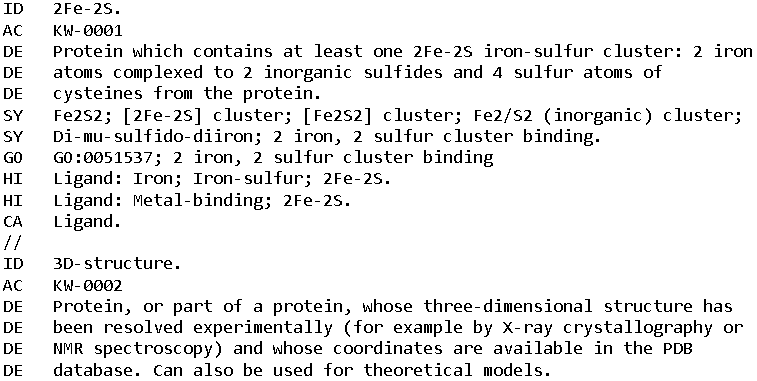 **...**

Onde cada sigla tem um significado:

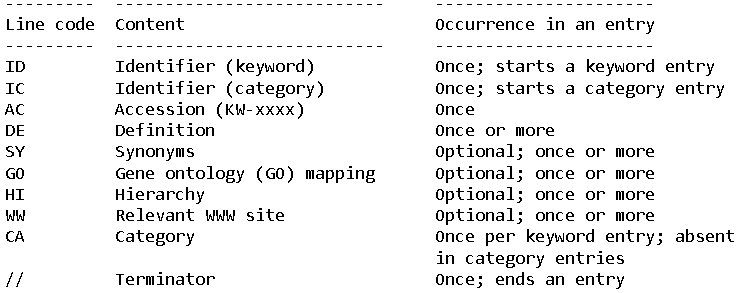

As entradas nesse arquivo podem ser analisadas pela função **parse** do módulo `Bio.SwissProt.KeyWList`. Cada entrada está armazenada como um `Bio.SwissProt.KeyWList.Record`, que é um dicionário Python. O arquivo usado como exemplo está no mesmo repositório que este arquivo:

In [1]:
from Bio.SwissProt import KeyWList
identificador = open('keywlist.txt')
registros = KeyWList.parse(identificador)
for registro in registros:
    print(registro['ID'])
    print(registro['DE'])
    print('\n')

2Fe-2S.
Protein which contains at least one 2Fe-2S iron-sulfur cluster: 2 iron atoms complexed to 2 inorganic sulfides and 4 sulfur atoms of cysteines from the protein.


3D-structure.
Protein, or part of a protein, whose three-dimensional structure has been resolved experimentally (for example by X-ray crystallography or NMR spectroscopy) and whose coordinates are available in the PDB database. Can also be used for theoretical models.


3Fe-4S.
Protein which contains at least one 3Fe-4S iron-sulfur cluster: 3 iron atoms complexed to 4 inorganic sulfides and 3 sulfur atoms of cysteines from the protein. In a number of iron-sulfur proteins, the 4Fe-4S cluster can be reversibly converted by oxidation and loss of one iron ion to a 3Fe-4S cluster.




## 10.2 Analisando registros Prosite

Prosite é um banco de dados que contém domínios proteicos, famílias de proteínas, sítos funcionais bem como os padrões e perfis para reconhecê-los. Prosite foi desenvolvido em paralelo com o Swiss-Prot. No Biopython, um registro Prosite é representado pela classe `Bio.ExPASy.Prosite.Record`, cujos membros correspondem aos diferentes campos em um registro Prosite.

De modo geral, um arquivo Prosite pode conter mais de um registro Prosite. Por exemplo, todos os registros do Prosite contêm XXXXX registros, que podem ser baixados em um único arquivo pelo site: https://ftp.expasy.org/databases/prosite/prosite.dat.

Agora podemos pegar os registros um por um e mostrar algumas de suas informações. Por exemplo, usando o arquivo contendo o banco de dados Prosite completo, encontramos:

In [ ]:
from Bio.ExPASy import Prosite
identificador = open('prosite.dat')
registros = Prosite.parse(identificador)
registro = next(registros)

In [ ]:
registro.accession

In [ ]:
registro.name

In [ ]:
registro.pdoc

In [ ]:
registro = next(registros)

In [ ]:
registro.accession

In [ ]:
registro.name

In [ ]:
registro.pdoc

In [ ]:
registro = next(registros)

In [ ]:
registro.accession

In [ ]:
registro.name

In [ ]:
registro.pdoc

E assim por diante. Se você estiver interessado em quantos registros há no documento, você pode fazer o seguinte:

In [ ]:
from Bio.ExPASy import Prosite
identificador = open('prosite.dat')
registros = Prosite.parse(identificador)
n = 0
for registro in registros:
    n += 1

Também há a função **read** que funciona para somente um registro no arquivo, se não existir um registro ou ter mais de um; é retornado o erro **ValueError**.

## 10.3 Analisando os registros da documentação Prosite

No exemplo Prosite acima, a variável **registro.pdoc** possui os números de acesso 'PDOC00001', 'PDOC00004', 'PDOC00005' e assim por diante para referenciar a documentação Prosite. Os registros dessas documentações estão disponíveis no ExPASy como arquivos individuais e também como um arquivo contendo todos os registros de documentação Prosite (https://ftp.expasy.org/databases/prosite/prosite.doc).

Podemos usar o analisador presente em `Bio.ExPASy.Prodoc` para analisar os registros da documentação Prosite. Por exemplo, para criar uma lista de todos os números de acesso, você pode usar:

In [ ]:
from Bio.ExPASy import Prodoc
identificador = open('prosite.doc')
registros = Prodoc.parse(identificador)
acessos = [registro.accession for registro in registros]
print(acessos[:10])

Novamente, a função **read()** pode ser usada desde que haja somente um registro na documentação Prosite.

## 10.4 Analisando registros de enzimas

O banco de dados de enzimas do ExPASy é um repositório de informação de nomenclatura enzimática. Um típico registro enzimatico se parece com isso:

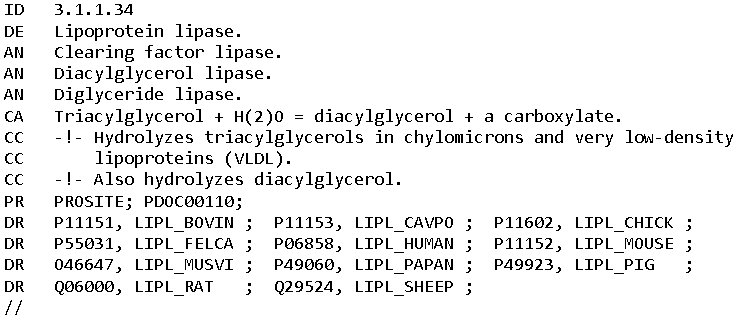

Nesse exemplo, a primeira linha mostra o número EC (*Enzyme Commission*) da lipoproteína lipase (segunda linha). Os nomes alternativos estão nas linha indicadas com AN (*Alternative Names*), "clearing factor lipase", "diacyglycerol lipase" e diglyceride lipase" (linhas 3 a 5). A linha que começa com CA mostra a atividade catalítica (*catalytic activity*) dessa enzima. As linhas de comentário começam com CC. A linha PR mostra as referências dos registros na documentação Prosite e as linha DR, nos registros Swiss-Prot. Nenhuma dessas entradas está necessariamente presente em um registro enzimático.

No Biopython, um registro enzimático é respresentado pela classe `Bio.ExPASy.Enzyme.Record`. Esse registro deriva de um dicionário Python e possui chaves correspondentes aos códigos usados nos arquivos de enzimas. Para ler o arquivo que possui somente um registro, usaremos a função **read** do módulo `Bio.ExPASy.Enzyme`. O arquivo em questão está no mesmo repositório que este documento:

In [2]:
from Bio.ExPASy import Enzyme
with open('lipoprotein.txt') as identificador:
    registro = Enzyme.read(identificador)

In [3]:
registro['ID']

'3.1.1.34'

In [4]:
registro['DE']

'Lipoprotein lipase.'

In [5]:
registro['AN']

['Clearing factor lipase.', 'Diacylglycerol lipase.', 'Diglyceride lipase.']

In [6]:
registro['CA']

'Triacylglycerol + H(2)O = diacylglycerol + a carboxylate.'

In [7]:
registro['PR']

['PDOC00110']

In [8]:
registro['CC']

['Hydrolyzes triacylglycerols in chylomicrons and very low-density lipoproteins (VLDL).',
 'Also hydrolyzes diacylglycerol.']

In [9]:
registro['DR']

[['P11151', 'LIPL_BOVIN'],
 ['P11153', 'LIPL_CAVPO'],
 ['P11602', 'LIPL_CHICK'],
 ['P55031', 'LIPL_FELCA'],
 ['P06858', 'LIPL_HUMAN'],
 ['P11152', 'LIPL_MOUSE'],
 ['O46647', 'LIPL_MUSVI'],
 ['P49060', 'LIPL_PAPAN'],
 ['P49923', 'LIPL_PIG'],
 ['Q06000', 'LIPL_RAT'],
 ['Q29524', 'LIPL_SHEEP']]

O conjunto completo de registros enzimáticos pode ser baixado em um único arquivo pelo site https://ftp.expasy.org/databases/enzyme/enzyme.dat. Para analisar esses vários registros, use a função **parse** de `Bio.ExPASy.Enzyme`:

In [ ]:
from Bio.ExPASy import Enzyme
identificador = open('enzyme.dat')
registros = Enzyme.parse(identificador)

Agora podemos iterar sobre os registros de uma única vez. Por exemplo, podemos criar uma lista com todos os números EC para cada registro enzimático disponível:

In [ ]:
numeros_ec = [registro['ID'] for registro in registro]
print(numeros_ec[:10])

## 10.5 Acessando o servidor ExPASy

Os registros de Swiss-Prot, Prosite e documentação Prosite podem ser baixados do servidor ExPASy no site https://www.expasy.org/. Quatro opções de consultas estão disponíveis pelo ExPASy:

- **get_prodoc_entry**: Para baixar um registro da documentação Prosite em formato HTML;

- **get_prosite_entry**: Para baixar um registro Prosite em formato HTML;

- **get_prosite_raw**: Para baixar um registro Prosite ou documentação Prosite no formato bruto e;

- **get_sprot_raw**: Para baixar um registro Swiss-Prot no formato bruto.

### 10.5.1 Recuperando um registro Swiss-Prot

Vamos dar uma olhada nas chalcona sintases das Orquídeas. Chalcona sintase está envolvida na biosíntese dos flavonóides em plantas e esses flavonóides fazem coisas muito legais nas plantas, como a pigmentação e proteção dos raios ultravioleta.

Se você pesquisar no Swiss-Prot, você pode encontrar três proteínas para Chalcona Sintase, com os números de identificação O23729, O23730, O23731. Agora, vamos escrever um código que pega esses códigos e analisa algumas infomações interessantes.

Primeiro, vamos pegar os registros usando a função **get_sprot_raw()** do módulo `Bio.ExPasy`. Essa função é muito boa, pois você pode alimentá-la com um ID e obter um identificador para o texto bruto. Podemos usar então a função **read** para mostrar o registro Swiss-Prot ou obter um objeto **SeqRecord**. O código abaixo mostra o que foi explicado:

In [ ]:
from Bio import ExPASy
from Bio import SwissProt
acessos = ['O23729', 'O23730', 'O23731']
registros = []
for acesso in acessos:
    identificador = ExPASy.get_sprot_raw(acesso)
    registro = SwissProt.read(identificador)
    registros.append(registro)

Se o número de acesso que você forneceu à função **get_sprot_raw()** não existir, é retornado o erro **ValueError**. Você pode detectar esse erro usando o tratamento de exceções para detectar esses números de acessos inválidos:

In [ ]:
from Bio import ExPASy
from Bio import SwissProt
acessos = ['O23729', 'O23730', 'O23731']
registros = []
for acesso in acessos:
    identificador = ExPASy.get_sprot_raw(acesso)
    try:
        registro = SwissProt.read(identificador)
    except ValueError:
        print(f'AVISO: O número de acesso {acesso} não foi encontrado.')
    registros.append(registro)

### 10.5.2 Pesquisando Swiss-Prot

Você pode estar se perguntando: "Mas como que eu vou saber quais são os números de acesso que preciso?". Quando você não possui esses números, você tem que visitar o site https://www.uniprot.org/ e pesquisar as proteínas manualmente, já que o Biopython não possui uma função para pesquisar esses números para você. Aqui é uma grande possibilidade de você contribuir com o Biopython!

### 10.5.3 Recuperando registros de Prosite e documentação Prosite

Os registros Prosite e documentação Prosite podem ser recuperadas como HTML o em seu formato bruto. Para analisar esses registros com o Biopython, você deve recperar os regstros no formato bruto. Para outros propósitos, entretanto, você deve se interessar nesses registros no formato HTML.

Para recuperar os registros Prosite e documentação Prosite no formato bruto, use a função **get_prosite_raw()**. Por exemplo, para baixar o registro Prosite e mostrá-lo no formato bruto, use:

In [ ]:
from Bio import ExPASy
identificador = ExPASy.get_prosite_raw('PS00001')
texto = identificador.read()
print(texto)

Para recuperar um registro Prosite e analisá-lo em um objeto `Bio.ExPASy.Prosite`, use:

In [ ]:
from Bio import ExPASy
from Bio.ExPASy import Prosite
identificador = ExPASy.get_prosite_raw('PS00001')
registro = Prosite.read(identificador)
print(registro)

A mesma função pode ser usada para recuperar um registro de documentação Prosite e analisá-lo em um objeto `Bio.ExPASy.Prodoc`, use:

In [ ]:
from Bio import ExPASy
from Bio.ExPASy import Prodoc
identificador = ExPASy.get_prosite_raw('PS00001')
registro = Prodoc.read(identificador)
print(registro)

Para números de acesso inexistentes, a função **get_prosite_raw()** retorna uma string vazia. Quando lidamos com uma string vazia, `Prosite.read` e `Prodoc.read` retornarão o erro **ValueError**. Para evitar isso, podemos fazer um tratamento de erros semelhante ao visto na **Seção 10.5.1**.

As funções **get_prosite_entry()** e **get_prodoc_entry()** são usadas para baixar registros Prosite e documentação Prosite no formato HTML. Para criar uma página na web mostrando um registro Prosite, use:

In [ ]:
from Bio import ExPASy
identificador = ExPASy.get_prosite_entry('PS00001')
html = identificador.read()
with open('meu_registro_prosite.html', 'w') as saida:
    saida.write(html)

E pode ser feita a mesma coisa para o registro de documentação Prosite:

In [ ]:
from Bio import ExPASy
identificador = ExPASy.get_prodoc_entry('PS00001')
html = identificador.read()
with open('meu_registro_prodoc.html', 'w') as saida:
    saida.write(html)

Para essas funções, um número de acesso inválido retorna uma mensagem de erro no formato HTML.

## 10.6 Escaneando o banco de dados Prosite

A ferramenta *ScanProsite* (https://prosite.expasy.org/prosite.html) permite que você escaneie sequências de proteínas online contra o banco de dados Prosite, fornecendo um identificador de sequência UniProt, ou PDB ou até mesmo a sequência em si. Para mais informações, veja a documentação online (https://prosite.expasy.org/prosite_doc.html), bem como a documentação para acessar o *ScanProsite* via programação (https://prosite.expasy.org/scanprosite/scanprosite_doc.html).

Você pode usar o módulo `Bio.ExPASy.ScanProsite` para escanear o banco de dados Prosite pelo Python. Esse módulo ajuda você a acessar o *ScanProsite* via programação e analisa os resultados retornados por essa ferramenta. Para fazer uma verredura de padrões Prosite na seguinte sequência de proteínas, use:

In [ ]:
from Bio.ExPASy import ScanProsite
sequencia = 'MEHKEVVLLLLLFLKSGQGEPLDDYVNTQGASLFSVTKKQLGAGSIEECAAKCEEDEEFTCRAFQYHSKEQQCVIMAENRKSSIIIRMRDVVLFEKKVYLSECKTGNGKNYRGTMSKTKN'
identificador = ScanProsite.scan(seq=sequencia)

Executando o **identificador.read()**, você obtem a busca dos resultados em um XML bruto. Ao invés disso, vamos usar o `Bio.ExPASy.ScanProsite.read` para analisar o XML bruto em um objeto Python:

In [ ]:
resultado = ScanProsite.read(identificador)
type(resultado)

Um objeto `Bio.ExPASy.ScanProsite.Record` é derivado de uma lista, onde cada elemento é uma lista que armazena um hit ScanProsite. Esse objeto também guarda o número de hits, bem xomo o número de pesquisa das sequências, como retornado pelo *ScanProsite*. Essa pesquisa de exemplo resulta em  hits:

In [ ]:
resultado.n_seq

In [ ]:
resultado.n_match

In [ ]:
len(resultado)

In [ ]:
resultado[0]

In [ ]:
resultado[1]

In [ ]:
resultado[2]

In [ ]:
resultado[3]

In [ ]:
resultado[4]

In [ ]:
resultado[5]

Outros parâmetros do *ScanProsite* podem ser passados como argumentos de palvras-chaves. Como um exemplo, passe o argumento **lowscore=1** para incluir matches com baixa pontuação, com isso temos mais um hit como resultado:

In [ ]:
identificador = ScanProsite.scan(seq=sequencia, lowscore=1)
resultado = ScanProsite.read(identificador)
resultado.n_match

Só isso, mais nada!